In [1]:
print('ok')

ok


In [2]:
import numpy as np  
import pandas as pd
import io
import requests
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

In [3]:
conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB  anaconda

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 --> 2019.11.28-py36_0 anaconda
    openssl: 1.1.1d-h7b6447c_3 --> 1.1.1-h7b6447c_0  anaconda


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install openpyxl

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 anaconda --> 2019.11.28-py36_0

The following packages will be DOWNGRADED:

    openssl: 1.1.1-h7b6447c_0  anaconda --> 1.1.1d-h7b6447c_3


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


###STARTTTTTT

In [3]:
#Reading the file

df = pd.read_excel('xxx.xlsx')

df.drop(['Unnamed: 0'], axis=1, inplace=True)

len(df)

499

In [44]:
for i in range(len(df)):
    n=0
    for char in df['FormH'][i]:
        if char=='D':
            n+=1
        elif char=='W':
            n+=3
    df.at[i, 'Sum'] = n
    
for i in range(len(df)):
    n=0
    for char in df['FormA'][i]:
        if char=='D':
            n+=1
        elif char=='W':
            n+=3
    df.at[i, 'SumA'] = n

for index, row in df.iterrows():
    for char in df['Result'][index]:
        if char in ["H","D","A"]:
            df.at[index, 'Result'] = char

In [45]:
df.head()

,Away,EloA,EloH,FormA,FormH,Home,PA,PD,PH,Result,Sum,SumA,DivSum,DSum,DElo
0,Arsenal,1813,1603,D W L D D L D,L L D L L L W,Norwich,57.1,23.1,25.0,D,4,7,0.588235,-3.0,-210.0
1,SheffieldUnited,1673,1745,L D W D W D D,W W D D D W W,Wolves,23.8,28.6,52.6,D,15,10,1.520000,7.0,72.0
2,Everton,1701,1820,L L W L D W L,W L W W W W W,Leicester,19.0,25.0,62.1,H,18,7,2.526316,15.0,119.0
3,AstonVilla,1641,1795,D W W L L L W,D L D W L W D,ManUnited,14.3,22.2,69.0,D,9,10,0.814815,-2.0,154.0
4,ManCity,1994,1698,W L W W W L W,L W L D W W L,Newcastle,86.2,12.5,7.7,D,10,15,0.634146,-7.0,-296.0


In [46]:
for i, row in df.iterrows():
    df.at[i, 'DivSum'] = df['Sum'][i]/float(df['SumA'][i]+0.5)
    df.at[i, 'DSum'] = df['Sum'][i]-(df['SumA'][i])
    df.at[i,'DElo'] = df['EloH'][i]- df['EloA'][i]

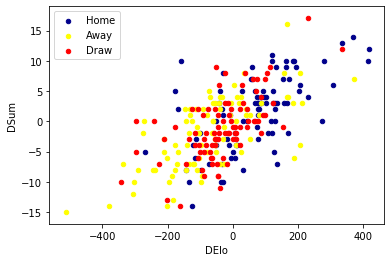

In [47]:
xa = 'DElo'
ya='DSum'
ax = df[df['Result'] == 'H'][0:90].plot(kind='scatter', x=xa, y=ya, color='DarkBlue', label='Home');
df[df['Result'] == 'A'][0:90].plot(kind='scatter', x= xa, y=ya, color='Yellow', label='Away', ax=ax);
df[df['Result'] == 'D'][0:90].plot(kind='scatter', x=xa, y=ya, color='Red', label='Draw', ax=ax)
plt.show()

In [74]:
#Train/test set with sum of FORM-ELO

X = np.asarray(df[[ 'Sum', 'SumA', 'EloA','EloH']])

#X = df[['DSum', 'EloH', 'EloA']] .values  #.astype(float)
#X = df[['EloH','EloA']] .values

#Train/test set with BETS
#X = df[['PH', 'PD', 'PA']] .values  #.astype(float)

y = df['Result'].values


Modeling
========

In [75]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
#print ('Train set:', X_train.shape,  y_train.shape)
#print ('Test set:', X_test.shape,  y_test.shape)

In [76]:
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
yhat = clf.predict(X_test)

In [78]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6

In [79]:
yhat_prob = clf.predict_proba(X_test)

In [80]:
yhat_prob 

array([[0.34246675, 0.25475807, 0.40277518],
       [0.24104895, 0.24067973, 0.51827132],
       [0.22637293, 0.23609401, 0.53753306],
       [0.22554386, 0.23386375, 0.54059238],
       [0.28011503, 0.22248761, 0.49739736],
       [0.30465512, 0.23517194, 0.46017294],
       [0.30093952, 0.2581328 , 0.44092769],
       [0.17284971, 0.23932281, 0.58782748],
       [0.19616745, 0.23719371, 0.56663885],
       [0.23531824, 0.24080487, 0.5238769 ],
       [0.34986415, 0.25099132, 0.39914453],
       [0.36673878, 0.25982754, 0.37343368],
       [0.25250049, 0.2364736 , 0.51102592],
       [0.41194005, 0.2608978 , 0.32716215],
       [0.11193669, 0.25279066, 0.63527265],
       [0.39829663, 0.254713  , 0.34699037],
       [0.14502111, 0.21386853, 0.64111036],
       [0.24310872, 0.23332624, 0.52356504],
       [0.44572259, 0.28394071, 0.27033669],
       [0.13138248, 0.21173555, 0.65688197],
       [0.43426755, 0.25874309, 0.30698936],
       [0.32838609, 0.25193483, 0.41967908],
       [0.

0.58
